# Presentación Ejercicio 3
## Inteligencia Artificial - Ing. en Sistemas de Información - UTN Facultad Regional Villa Maria
### Natalia Bruno 

Empleando algún método de separación en conjuntos de entrenamiento y test, resolver los siguientes ejercicios (extendiendo el código inicial que se muestra en la celda siguiente):

1. Declarar una variable random_state igual al número de alumno en la hoja de cálculo "Entregas TPs" en el Google Drive de la materia.

2. Elegir 1 feature (entre NOX (4), RM (5), AGE (6) y DIS (7)) y entrenar un modelo de regresión polinomial tomando en cuenta cómo dicho feature predice el valor de la casa. Para efectuar la separación entre subconjuntos de entrenamiento y test, usar el random_state correspondiente.

3. En base a dicho modelo, mostrar un gráfico donde se aprecie la distancia entre los valores de $\hat{y}$ y los valores de $y$ para el feature seleccionado (estilo al gráfico de regresión lineal o el gráfico de regresión polinomial utilizado como ejemplo en este notebook).

4. Entrenar con distintos grados del polinomio el modelo con el feature elegido. Graficar el bias-variance tradeoff para el error cuadrático medio en base a los distintos grados del polinomio, donde se muestren las curvas de error cuadrático medio de entrenamiento y error cuadrático medio de test. Ayuda: para graficarlo, utilizar el grado del polinomio en el eje de las $x$ y el error cuadrático medio en el eje de las $y$.

5. Especificar cuál es el grado del polinomio en el cual se minimiza el error de test.

6. Completar el código de KFolds para el modelo de regresión polinomial de grado 5, entrenarlo con el feature elegido e imprimir el error cuadrático medio, promediado entre los 10 folds. Utilizar Shuffle=true y el random_state correspondiente.

Fecha de entrega: **03/05/2017**.

In [17]:
# Punto 1 y 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import load_boston

# Se instancia el dataset
boston = load_boston()

# Matriz de (datos, predictores)
X = boston.data

# Variable de respuesta (precio de la casa en miles de dólares)
y = boston.target

# Selecciono el feature nro. 5 = promedio de habitaciones por vivienda. 
X_feature = X[:,5]
X = X_feature[:, np.newaxis]

# Declaro una variable random_state igual a mi numero de alumno (2)
rns = np.random.RandomState(2)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= rns)

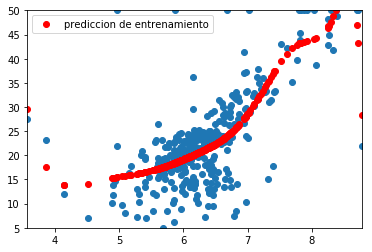

In [18]:
#Punto 3

# Realizo la predicción con un polinomio de grado 15
poly = PolynomialFeatures(degree=15)

# Los datos se adaptan al modelo y se transforman a la forma polinómica
X_train_poly = poly.fit_transform(X_train, y_train)

# Se utiliza un nuevo regresor lineal, el cual efectúa la regresión polinómica
# al adaptar los datos transformados.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

# Mustro como el modelo predice la salida
# se pueden observar las distancias entre los valores de Y_hat e Y para el feature elegido

# Entrenamiento
axes = plt.subplot(111) # Establecemos límites fijos para el gráfico
axes.set_xlim(X.min(), X.max())
axes.set_ylim(y.min(), y.max())
plt.plot(X_train, y_train, 'o')
plt.plot(X_train, poly_regressor.predict(X_train_poly), 'or', label = 'prediccion de entrenamiento')
plt.legend(loc='best')  
plt.show()


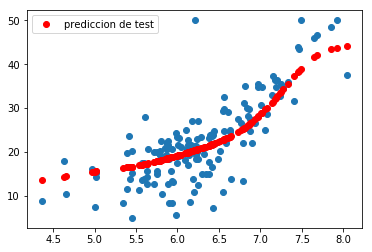

In [19]:
# Test
X_test_poly = poly.transform(X_test)
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, poly_regressor.predict(X_test_poly), 'or', label = 'prediccion de test')
plt.legend(loc='best')
plt.show()

In [20]:
print('MSE entrenamiento: ',mean_squared_error(y_train, poly_regressor.predict(X_train_poly)))
print('MSE test: ',mean_squared_error(y_test, poly_regressor.predict(X_test_poly)))


MSE entrenamiento:  35.6737507182
MSE test:  30.4992485211


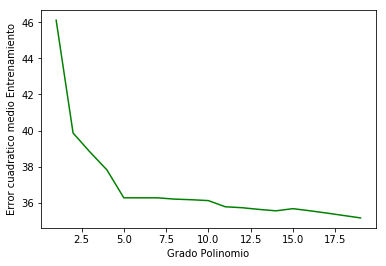

In [21]:
# Punto 4

# Entreno el modelo con polinomios de grado 1 a 19
# Grafico el bias-variance tradeoff para el error cuadrático medio en base a los distintos grados del polinomio

# Error cuadrático medio de entrenamiento 

grado = []
errortrain = []

for i in range(1, 20):
    grado.append(i)
    
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train, y_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, y_train)
    X_test_poly = poly.transform(X_test)
    
    errortrain.append(mean_squared_error(y_train, poly_regressor.predict(X_train_poly)))
    
plt.plot(grado, errortrain, 'g-')
plt.xlabel("Grado Polinomio")
plt.ylabel("Error cuadratico medio Entrenamiento") 
plt.show()

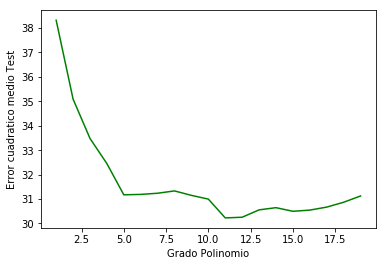

In [22]:
grado = []
errortest = []
for i in range(1, 20):
    grado.append(i)
    
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train, y_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, y_train)
    X_test_poly = poly.transform(X_test)
    
    errortest.append(mean_squared_error(y_test, poly_regressor.predict(X_test_poly)))
    
#print(grado)
#print(errores)

plt.plot(grado, errortest, 'g-')
plt.xlabel("Grado Polinomio")
plt.ylabel("Error cuadratico medio Test") 
plt.show()

In [23]:
# Punto 5:
print("El grado de polinomio que minimiza el error del test es: ",errortest.index(min(errortest))+1) 
# Sumo uno al indice que nos devuelve ya que python indexa los vectores comenzando desde 0 (cero)

El grado de polinomio que minimiza el error del test es:  11


In [24]:
# Punto 6

from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True,random_state=rns)

test_error_poly = []

e = []
t = []
errorE = 0
errorT = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    poly = PolynomialFeatures(degree=5)
    X_train_poly = poly.fit_transform(X_train, y_train)
    poly_regressor = LinearRegression()
    
    poly_regressor.fit(X_train_poly, y_train)
    X_test_poly = poly.transform(X_test)
    
    MSEe = mean_squared_error(y_train, poly_regressor.predict(X_train_poly))
    MSEt = mean_squared_error(y_test, poly_regressor.predict(X_test_poly))
    
    e.append(MSEe)
    t.append(MSEt)
    
errorE = np.mean(e)
errorT = np.mean(t)

print('MSE entrenamiento: ', errorE)
print('MSE test: ', errorT)
    

MSE entrenamiento:  34.5138996375
MSE test:  36.072035478
